In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
#Datei einlesen und anzeigen:
df = pd.read_csv("/Users/carareusch/Desktop/TechsLabTeam2/TechsLabTeam2/Data/Raw/Hotel/hotel_bookings.csv", encoding="ISO-8859-1", sep=',')

df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [21]:
#Tage des Aufenthalts addieren:
df["duration_of_stay"]= df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

In [54]:
#Spalten nach Hotels gruppieren:
hotel_grp=df.groupby(["hotel"])

#Aufenthalt für das Resort Hotel herausfinden:
stay_resort = hotel_grp.get_group("Resort Hotel")["duration_of_stay"].value_counts().to_dict()

print(stay_resort)

{1: 7748, 7: 6596, 2: 6217, 3: 5695, 4: 4826, 5: 2787, 6: 1798, 10: 940, 14: 816, 8: 776, 9: 628, 0: 384, 11: 314, 12: 158, 13: 100, 21: 61, 25: 35, 15: 33, 28: 31, 18: 28, 16: 24, 17: 12, 19: 10, 22: 7, 23: 6, 30: 5, 35: 5, 42: 4, 29: 3, 26: 3, 56: 2, 46: 1, 69: 1, 45: 1, 33: 1, 60: 1, 27: 1, 20: 1, 38: 1}


/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_83119/1340201193.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  stay_resort = hotel_grp.get_group("Resort Hotel")["duration_of_stay"].value_counts().to_dict()


In [56]:
#Aufenthalt für das City Hotel herausfinden:
stay_city = stay_resort = hotel_grp.get_group("City Hotel")["duration_of_stay"].value_counts().to_dict()

print(stay_city)

{2: 21426, 3: 21381, 1: 13272, 4: 12557, 5: 4997, 6: 2059, 7: 2059, 8: 385, 0: 331, 9: 213, 10: 199, 14: 100, 11: 82, 12: 65, 13: 42, 15: 42, 16: 16, 20: 13, 19: 12, 29: 11, 21: 10, 17: 8, 30: 8, 18: 7, 22: 7, 24: 6, 27: 4, 28: 4, 26: 3, 23: 2, 25: 2, 33: 2, 48: 1, 49: 1, 57: 1, 34: 1, 43: 1}


/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_83119/3443695279.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  stay_city = stay_resort = hotel_grp.get_group("City Hotel")["duration_of_stay"].value_counts().to_dict()


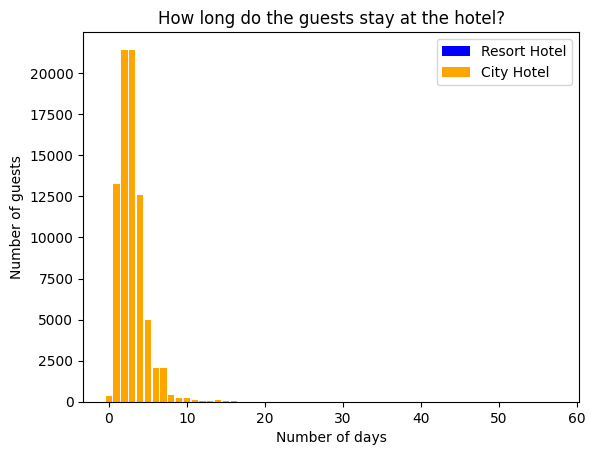

In [62]:

# X-Achse: Anzahl der Tage
x_resort = stay_resort.keys()
x_city = stay_city.keys()

# Y-Achse: Anzahl der Gäste für das Resort und das Stadthotel
y_resort = stay_resort.values()
y_city = stay_city.values()

# Säulendiagramm erstellen
plt.bar(x_resort, y_resort, color='blue', label='Resort Hotel')
plt.bar(x_city, y_city, color='orange', label='City Hotel')

# Beschriftungen hinzufügen
plt.xlabel('Number of days')
plt.ylabel('Number of guests')
plt.title('How long do the guests stay at the hotel?')
plt.legend()

# Diagramm anzeigen
plt.show()

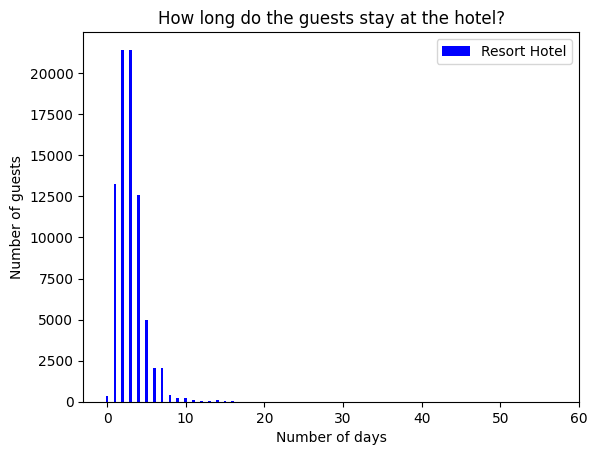

In [64]:
# X-Achse: Anzahl der Tage
x = stay_resort.keys()

# Y-Achse: Anzahl der Gäste für das Resort und das Stadthotel
y_resort = stay_resort.values()

# Breite der Säulen
bar_width = 0.35

# Säulendiagramm erstellen
plt.bar(x, y_resort, bar_width, color='blue', label='Resort Hotel')

# Beschriftungen hinzufügen
plt.xlabel('Number of days')
plt.ylabel('Number of guests')
plt.title('How long do the guests stay at the hotel?')
plt.legend()

# Diagramm anzeigen
plt.show()

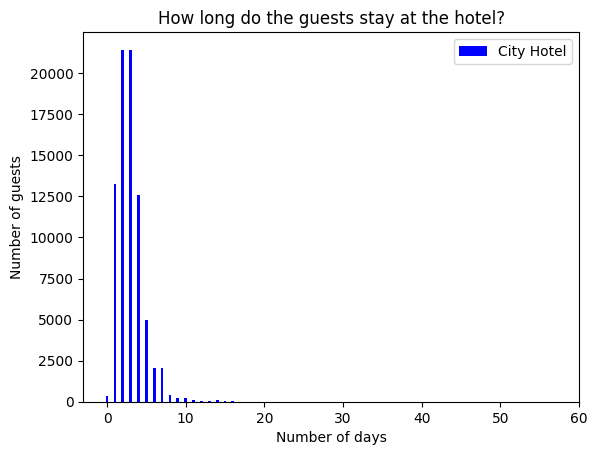

In [65]:
# X-Achse: Anzahl der Tage
x = stay_city.keys()

# Y-Achse: Anzahl der Gäste für das Resort und das Stadthotel
y_city = stay_city.values()

# Breite der Säulen
bar_width = 0.35

# Säulendiagramm erstellen
plt.bar(x, y_city, bar_width, color='blue', label='City Hotel')

# Beschriftungen hinzufügen
plt.xlabel('Number of days')
plt.ylabel('Number of guests')
plt.title('How long do the guests stay at the hotel?')
plt.legend()

# Diagramm anzeigen
plt.show()